# Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Text(0.5, 1.0, 'Data Cluster')

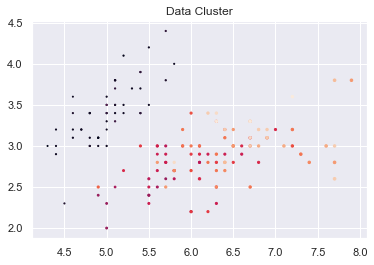

In [4]:
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'],iris['PetalLengthCm'],iris['PetalWidthCm'])
plt.title('Data Cluster')

# Visualisation

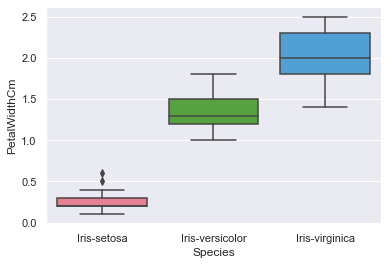

In [5]:
sns.boxplot(x="Species", y="PetalWidthCm", palette="husl", data=iris)

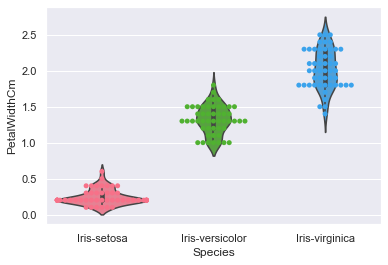

In [6]:
sns.violinplot(x="Species", y="PetalWidthCm", palette="husl", data=iris)
sns.swarmplot(x="Species", y="PetalWidthCm", palette="husl", data=iris)

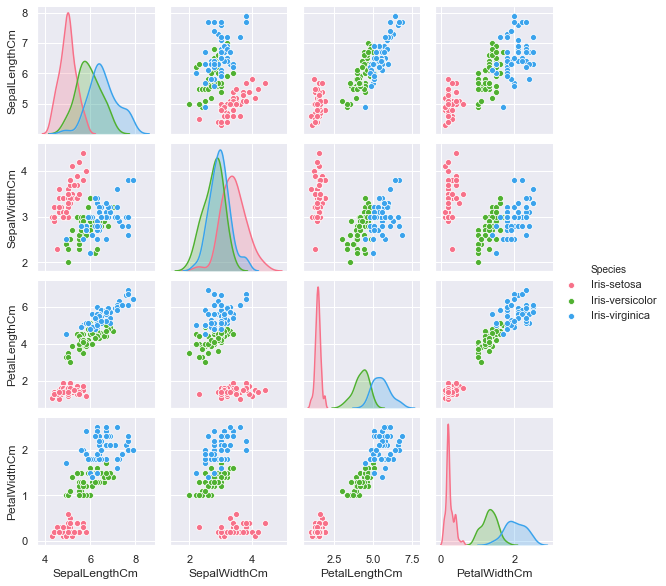

In [7]:
sns.pairplot(iris.drop('Id',axis=1),hue="Species",palette="husl", size=2, diag_kind="kde")

In [8]:
iris.drop(['SepalLengthCm', 'SepalWidthCm'],axis='columns',inplace=True)

In [9]:
iris.head()

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa


# Optimizing Clusters

In [10]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(iris[['PetalLengthCm','PetalWidthCm']])
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
iris['cluster'] = yp
iris.head(2)

,Id,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,1.4,0.2,Iris-setosa,0
1,2,1.4,0.2,Iris-setosa,0


In [12]:
iris.cluster.unique()

array([0, 2, 1])

In [13]:
iris1 = iris[iris.cluster==0]
iris2 = iris[iris.cluster==1]
iris3 = iris[iris.cluster==2]

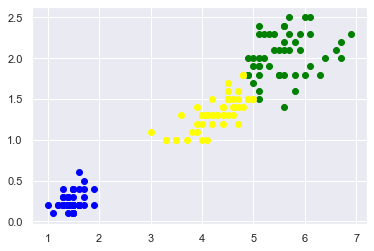

In [14]:
plt.scatter(iris1['PetalLengthCm'],iris1['PetalWidthCm'],color='blue')
plt.scatter(iris2['PetalLengthCm'],iris2['PetalWidthCm'],color='green')
plt.scatter(iris3['PetalLengthCm'],iris3['PetalWidthCm'],color='yellow')


In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

# Elbow Plot

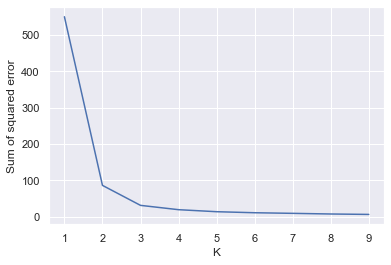

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)